In [1]:
import rhkpy
import numpy as np

In [2]:
rhkpy.__version__

'1.3.5'

Importing some data, from our previous publication in [Science Advances](https://www.science.org/doi/10.1126/sciadv.abo6879). The raw data is available here: [doi.org/10.6084](https://doi.org/10.6084/m9.figshare.20318907.v1)

# Loading data

In [2]:
# path to a dIdV map
datapath_map = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\cikkek - published\2022\RG magnetism\figures\splitting' + '\\'
filename_didvmap = '9K_ABC6_2020_11_02_08_47_19_209.sm4'
# spectra across a line
datapath_line = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\cikkek - published\2022\RG magnetism\figures\intro\line spec_peak shift' + '\\'
filename_line = '9K_ABC6_2020_11_01_12_12_27_213.sm4'
# single spectra
datapath_spec = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\cikkek - published\2022\RG magnetism\figures\intro\spectra' + '\\'
filename_spec1 = r'dI-dV_9K_ABC6_2020_10_17_13_54_34_531.sm4'
filename_spec2 = r'dI-dV_9K_ABC6_2020_11_01_21_03_19_089.sm4'

Let's load the spectra, using rhkpy. The sm4 files are loaded into instances of an rhkdata class. Documentation can be found here: [github.io/rhkpy](https://zrbyte.github.io/rhkpy/)

In [3]:
didvmap = rhkpy.rhkdata(datapath_map + filename_didvmap)
linespec = rhkpy.rhkdata(datapath_line + filename_line)
spec1 = rhkpy.rhkdata(datapath_spec + filename_spec1)
spec2 = rhkpy.rhkdata(datapath_spec + filename_spec2)

# Plotting

We can now use the `qplot()` "quick plot" method of each rhkdata object to take a look at the data.

In [4]:
didvmap.qplot()

Row
    [0] HoloViews(Image, sizing_mode='fixed')
    [1] Column
        [0] HoloViews(DynamicMap, sizing_mode='fixed')
        [1] WidgetBox(align=('end', 'start'))
            [0] DiscreteSlider(margin=(20, 20, 20, 20), name='bias', options=OrderedDict([('-0.2', ...]), value=-0.20000001601874828, width=250)

In [5]:
linespec.qplot()

Row
    [0] HoloViews(Image, sizing_mode='fixed')
    [1] Column
        [0] WidgetBox(align=('end', 'start'))
            [0] DiscreteSlider(margin=(20, 20, 20, 20), name='dist', options=OrderedDict([('0', ...]), value=0.0, width=250)
        [1] HoloViews(DynamicMap, height=300, sizing_mode='fixed', width=700)

In [6]:
spec1.qplot()

Row
    [0] HoloViews(Overlay, height=300, sizing_mode='fixed', width=400)
    [1] HoloViews(Overlay, height=300, sizing_mode='fixed', width=400)

# "Navigation"

Let's see how the data were measured, in relation to each other. This can be very helpful in data analysis. For this we can use the `navigation()` method.

In [7]:
rhkpy.navigation(didvmap, linespec, spec1, spec2)

:Overlay
   .Image.I                                                                                 :Image   [x,y]   (topography)
   .Curve.I                                                                                 :Curve   [x]   (y)
   .Curve.II                                                                                :Curve   [x]   (y)
   .Curve.III                                                                               :Curve   [x]   (y)
   .Curve.A_9K_ABC6_2020_11_02_08_47_19_209_full_stop_sm4                                   :Curve   [x]   (y)
   .Scatter.Spec_pos_colon_9K_ABC6_2020_11_02_08_47_19_209_full_stop_sm4                    :Scatter   [x]   (y)
   .Scatter.Spec_pos_colon_9K_ABC6_2020_11_01_12_12_27_213_full_stop_sm4                    :Scatter   [x]   (y)
   .Scatter.Spec_pos_colon_dI_hyphen_minus_dV_9K_ABC6_2020_10_17_13_54_34_531_full_stop_sm4 :Scatter   [x]   (y)
   .Scatter.Spec_pos_colon_dI_hyphen_minus_dV_9K_ABC6_2020_11_01_21_03_19_089_full_stop_sm4 :Scatter   [x]   (y)

We can see that `spec1`, or the spectrum "...531.sm4" was measured far from the map. Let's replot, without this one.

In [8]:
rhkpy.navigation(didvmap, linespec, spec2)

:Overlay
   .Image.I                                                                                 :Image   [x,y]   (topography)
   .Curve.I                                                                                 :Curve   [x]   (y)
   .Curve.II                                                                                :Curve   [x]   (y)
   .Curve.III                                                                               :Curve   [x]   (y)
   .Curve.A_9K_ABC6_2020_11_02_08_47_19_209_full_stop_sm4                                   :Curve   [x]   (y)
   .Scatter.Spec_pos_colon_9K_ABC6_2020_11_02_08_47_19_209_full_stop_sm4                    :Scatter   [x]   (y)
   .Scatter.Spec_pos_colon_9K_ABC6_2020_11_01_12_12_27_213_full_stop_sm4                    :Scatter   [x]   (y)
   .Scatter.Spec_pos_colon_dI_hyphen_minus_dV_9K_ABC6_2020_11_01_21_03_19_089_full_stop_sm4 :Scatter   [x]   (y)

The above plot, shows the topgraphy data in the `didvmap`, as well as the spectrum positions of the map. In green we can see the spectrum positions of the "line spectrum" and in red, the positions of the single spectrum.

The rhkdata class by default places a [flatten filter](https://zrbyte.github.io/rhkpy/rhkpy.html#rhkpy.rhkpy_process.polyflatten) on the topography data. We can prevent this and load the raw data by using the keyword: `loadraw = True`. Let's try this.

In [9]:
didvmap_raw = rhkpy.rhkdata(datapath_map + filename_didvmap, loadraw = True)

In [10]:
didvmap_raw.qplot()

Row
    [0] HoloViews(Image, sizing_mode='fixed')
    [1] Column
        [0] HoloViews(DynamicMap, sizing_mode='fixed')
        [1] WidgetBox(align=('end', 'start'))
            [0] DiscreteSlider(margin=(20, 20, 20, 20), name='bias', options=OrderedDict([('-0.2', ...]), value=-0.20000001601874828, width=250)

Let's plot the topography and current datasets from `didvmap`.

In [11]:
didvmap.image.topography.sel(scandir = 'backward').hvplot(cmap = 'fire')

:Image   [y,x]   (topography)

In [12]:
didvmap.image.current.sel(scandir = 'backward').hvplot(cmap = 'plasma')

:Image   [y,x]   (current)

# Peak fitting to spectroscopy data

Let's take a look at the spectra in the `didvmap`. This rhkdata instance, containing a map has two xarray variables:
- image
- spectra

As we've seen above, the images are contained in the `didvmap.image` variable. Let's take a look at the 'didvmap.spectra' variable.

First, let's plot one of the spectra.

In [13]:
didvmap.spectra

<xarray.Dataset>
Dimensions:      (bias: 201, specpos_y: 64, specpos_x: 64, repetitions: 1,
                  biasscandir: 2)
Coordinates:
  * bias         (bias) float64 0.2 0.198 0.196 0.194 ... -0.196 -0.198 -0.2
  * specpos_x    (specpos_x) float64 6.307 5.057 3.807 ... -69.94 -71.19 -72.44
  * specpos_y    (specpos_y) float64 -119.9 -121.1 -122.4 ... -197.4 -198.6
  * repetitions  (repetitions) int32 0
  * biasscandir  (biasscandir) <U5 'left' 'right'
Data variables:
    lia          (bias, specpos_y, specpos_x, repetitions, biasscandir) float64 ...
    current      (bias, specpos_y, specpos_x, repetitions, biasscandir) float64 ...
    x            (specpos_y, specpos_x) float64 6.307 5.057 ... -71.19 -72.44
    y            (specpos_y, specpos_x) float64 -119.9 -119.9 ... -198.6 -198.6
Attributes: (12/15)
    filename:           9K_ABC6_2020_11_02_08_47_19_209.sm4
    bias:               0.49999973
    bias units:         V
    setpoint:           99.99999439624929
    setpoint units:     pA
    measurement date:   11/01/20
    ...                 ...
    LI amplitude unit:  mV
    LI frequency:       1300.0
    LI frequency unit:  Hz
    LI phase:           -102.9999998
    datatype:           map
    spectype:           iv

Let's plot one of the spectra. We can choose which one, based on it's coordinates: `specpos_x`, `specpos_y`, in nanometers.

In [14]:
didvmap.qplot()

Row
    [0] HoloViews(Image, sizing_mode='fixed')
    [1] Column
        [0] HoloViews(DynamicMap, sizing_mode='fixed')
        [1] WidgetBox(align=('end', 'start'))
            [0] DiscreteSlider(margin=(20, 20, 20, 20), name='bias', options=OrderedDict([('-0.2', ...]), value=-0.20000001601874828, width=250)

In [15]:
didvmap_spec = didvmap.spectra.sel(specpos_x = -40, specpos_y = -130, method = 'nearest')
didvmap_spec

<xarray.Dataset>
Dimensions:      (bias: 201, repetitions: 1, biasscandir: 2)
Coordinates:
  * bias         (bias) float64 0.2 0.198 0.196 0.194 ... -0.196 -0.198 -0.2
    specpos_x    float64 -39.94
    specpos_y    float64 -129.9
  * repetitions  (repetitions) int32 0
  * biasscandir  (biasscandir) <U5 'left' 'right'
Data variables:
    lia          (bias, repetitions, biasscandir) float64 1.643 1.615 ... 1.871
    current      (bias, repetitions, biasscandir) float64 32.82 33.48 ... -26.95
    x            float64 -39.94
    y            float64 -129.9
Attributes: (12/15)
    filename:           9K_ABC6_2020_11_02_08_47_19_209.sm4
    bias:               0.49999973
    bias units:         V
    setpoint:           99.99999439624929
    setpoint units:     pA
    measurement date:   11/01/20
    ...                 ...
    LI amplitude unit:  mV
    LI frequency:       1300.0
    LI frequency unit:  Hz
    LI phase:           -102.9999998
    datatype:           map
    spectype:           iv

This xarray object still has dimensions of `bias`, `repetitions` and `biasscandir`. Let's plot the `lia` (dI/dV signal) from the dataset.

In [16]:
didvmap_spec.lia.hvplot.line(x = 'bias')

:DynamicMap   [biasscandir,repetitions]
   :Curve   [bias]   (lia)

Let's fit a double Gaussian to this.
For this we will take the mean of the data for the two bias scan directions.

In [17]:
didvmap_spec_mean = didvmap_spec.lia.mean(dim = ['repetitions', 'biasscandir'])
# Let's also sleect the data around the peaks
didvmap_spec_mean = didvmap_spec_mean.sel(bias = slice(0.08, -0.08))

For the fit we will specify some starting values. In this case, the estimated positions of the two Gaussians: `'x01': -0.02, 'x02': 0.02`

Values of starting parameters: 
 {'x01': -0.02, 'x02': 0.02, 'ampl1': 1, 'width1': 0.05, 'ampl2': 1, 'width2': 0.05, 'offset': 0} 

Values of fitted parameters:

x01 : -0.02
ampl1 : 2.46
width1 : 0.02
x02 : 0.02
ampl2 : 2.72
width2 : 0.02
offset : 1.32


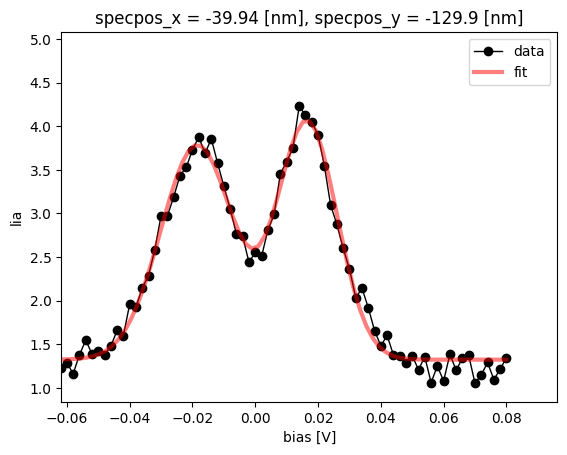

In [18]:
fit_spec = rhkpy.peakfit(didvmap_spec_mean, func = rhkpy.gaussian2, stval = {'x01': -0.02, 'x02': 0.02}, toplot = True)

We can do this for the whole map, as well. Let's fit a Gaussian.

In [19]:
didvmap_mean = didvmap.spectra.lia.mean(dim = ['repetitions', 'biasscandir'])
didvmap_mean = didvmap_mean.sel(bias = slice(0.08, -0.08))

In [20]:
fit_map = rhkpy.peakfit(
    didvmap_mean,
    func = rhkpy.gaussian,
    stval = {'x0': 0, 'width': 0.03})

Now, we have the fit results for each spectrum position in the map. We can plot these.
Let's try to plot the width of the Gaussian.

The `groupby` option in hvplot, let's us click through the parameters of the function.

In [21]:
fit_map.curvefit_coefficients.hvplot.image(x = 'specpos_x', groupby = 'param', cmap = 'plasma')

:DynamicMap   [param]
   :Image   [specpos_x,specpos_y]   (curvefit_coefficients)

Let's just plot the width.

In [22]:
np.abs(fit_map.curvefit_coefficients.sel(param = 'width')).hvplot.image(x = 'specpos_x', cmap = 'BuRd_r')

:Image   [specpos_x,specpos_y]   (curvefit_coefficients)